In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics

In [2]:
df = pd.read_csv('datasets/draft2_no_dummies_train.csv')

# Building Model 1
I'm using the most highly correlated features to predict the target, Sale Price. I experimented with using features that had 50+% correlation down to 30% correlation and found that 40% correlation produced the best effect.

In [3]:
correlations = pd.DataFrame(df.corr()['saleprice'].sort_values(ascending = False))
correlations.head()

,saleprice
saleprice,1.000000
overall_qual,0.799028
exter_qual,0.710894
gr_liv_area,0.698160
kitchen_qual,0.691090


In [4]:
correlations.rename(columns = {'saleprice': 'corr'}, inplace = True)
correlations.head(16)

,corr
saleprice,1.000000
overall_qual,0.799028
exter_qual,0.710894
gr_liv_area,0.698160
kitchen_qual,0.691090
total_bsmt_sf,0.630484
1st_flr_sf,0.620491
year_built,0.571165
year_remod/add,0.549456
full_bath,0.538883


In [5]:
corr_above40_list = correlations[correlations['corr']>.4].index.tolist()

In [6]:
print(type(corr_above40_list))
corr_above40_list

<class 'list'>


['saleprice',
 'overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_built',
 'year_remod/add',
 'full_bath',
 'mas_vnr_area',
 'totrms_abvgrd',
 'has_fireplace',
 'fireplaces',
 'heating_qc',
 'bsmtfin_sf_1',
 'has_mas_vnr']

In [7]:
corr_above40_list.remove('saleprice')

Also removing 'has_mas_vnr' because that is covered by the 'mas_vnr_area' column, so this is redundant.

In [8]:
corr_above40_list.remove('has_mas_vnr')

In [9]:
print(corr_above40_list)

['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'mas_vnr_area', 'totrms_abvgrd', 'has_fireplace', 'fireplaces', 'heating_qc', 'bsmtfin_sf_1']


In [10]:
X = df[corr_above40_list]
y = df['saleprice']

In [11]:
X.shape

(2028, 15)

In [12]:
X.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,3,1479,3,725.0,725,1976,2005,2,289.0,6,0,0,4,533.0
1,7,3,2122,3,913.0,913,1996,1997,2,132.0,8,1,1,4,637.0
2,5,2,1057,3,1057.0,1057,1953,2007,1,0.0,5,0,0,2,731.0
3,5,2,1444,2,384.0,744,2006,2007,2,0.0,7,0,0,3,0.0
4,6,2,1445,2,676.0,831,1900,1993,2,0.0,6,0,0,2,0.0


In [13]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state = 42)

In [14]:
lr1 = LinearRegression()

In [15]:
lr1.fit(X_train_1, y_train_1)

LinearRegression()

In [16]:
cross_val_score(lr1, X_train_1, y_train_1)

array([0.68400273, 0.84782123, 0.8538537 , 0.84922161, 0.69500178])

In [17]:
cross_val_score(lr1, X_train_1, y_train_1).mean()

0.7859802107600512

In [18]:
lr1.score(X_train_1, y_train_1)

0.8040499309496271

In [19]:
lr1.score(X_test_1, y_test_1)

0.8622194033550727

I'm very happy with this first model. The $r^2$ score for the training data is reasonably high, and the mean of the cross-validation score is also close. The $r^2$ score for the test data is actually higher than for the training data, so the model is not overfit.

In [20]:
preds1 = lr1.predict(X_test_1)
preds1[:5]

array([303852.08846031, 211464.37724694, 166577.81371864, 149912.62686094,
       269658.48171225])

In [21]:
null_pred = y.mean()
null_pred

180839.1701183432

In [22]:
y_test_1.shape

(507,)

In [23]:
null_pred_list = ([null_pred] * 507)
print(len(null_pred_list))
null_pred_list[:5]

507


[180839.1701183432,
 180839.1701183432,
 180839.1701183432,
 180839.1701183432,
 180839.1701183432]

In [24]:
type(null_pred_list)

list

In [25]:
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 1 RMSE: 28173.041763341123
Null Model RMSE: 75922.17182221451


In [26]:
#the mean of the test data.
y_test_1.mean()

178989.57001972388

In [27]:
28173.04/178_989.57

0.15740045635061306

The model RMSE (\\$28173.04) is higher than I'd want in a real world scenario, as it represents an error of ~16\% of the mean sale price in our test data, but the test RMSE represents a significant improvement over the null RMSE (\\$75,922.17)

Hank helped me work out how to put these together in the 4.04 exercise. I'm referencing the code from that exercise here, though I've built on it, as well. I used [this site](https://datatofish.com/round-values-pandas-dataframe/) to review how to round a column of a dataframe, as I wanted to present the coefficients rounded to two decimals to better represent money.

In [162]:
model_1_coefs = pd.DataFrame(lr1.coef_, index = X.columns)
model_1_coefs.rename(columns = {0: "Coefficients"}, inplace = True)
model_1_coefs.sort_values('Coefficients', ascending = False, inplace = True)
model_1_coefs['Coefficients'] = model_1_coefs['Coefficients'].round(decimals = 2)
model_1_coefs.export()

,Coefficients
exter_qual,16175.98
overall_qual,13621.00
kitchen_qual,12846.68
has_fireplace,8175.98
fireplaces,4412.43
totrms_abvgrd,2790.76
heating_qc,2359.09
full_bath,1179.58
year_built,203.81
year_remod/add,167.28


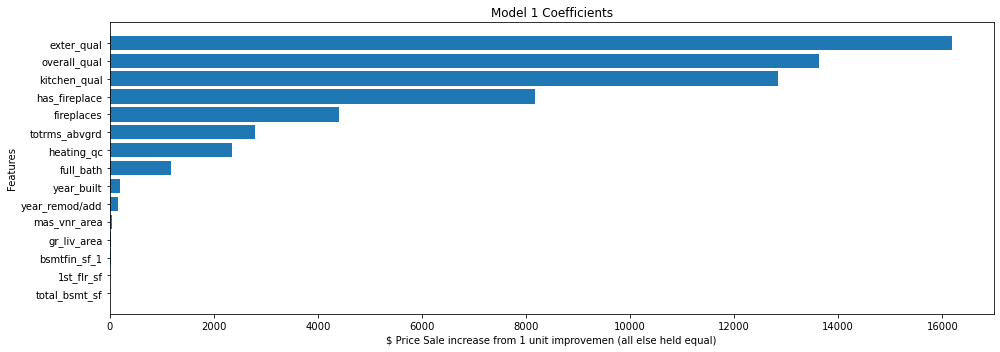

In [176]:
plt.figure(figsize = (14, 5))
plt.title('Model 1 Coefficients')
plt.xlabel('$ Price Sale increase from 1 unit improvemen (all else held equal)')
plt.ylabel('Features')
model_1_coefs.sort_values(['Coefficients'], inplace = True)
plt.barh(model_1_coefs.index, model_1_coefs['Coefficients'])

plt.tight_layout()
plt.savefig('images/coefficients.png');

Thinking ahead to recommendations for homeoweners, some of these (for example, Year Built) will be hard to act directly upon. That said, even Year Built is actionable in the sense that if you're thinking to sell, there's evidence that waiting a year as a small cost of approximately $204/year.

# **COME BACK HERE TO LOOK AT THE COEFFICIENTS FURTHER FOR INFERENCE**

-----

## First Kaggle Attempt

In [29]:
kaggledf = pd.read_csv('datasets/draft2_no_dummies_kaggle_test.csv')
kaggledf.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_surface,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,saleprice,has_bsmt,has_garage,has_mas_vnr,has_pool,has_alley,has_fireplace
0,2658,902301120,190,RM,69.0,9142,1,Grvl,0,Lvl,...,4,2006,WD,0,1,1,0,0,1,0
1,2718,905108090,90,RL,0.0,9662,1,None,1,Lvl,...,8,2006,WD,0,1,1,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,None,1,Lvl,...,9,2006,New,0,1,1,0,0,0,1
3,1989,902207150,30,RM,60.0,8520,1,None,0,Lvl,...,7,2007,WD,0,1,1,0,0,0,0
4,625,535105100,20,RL,0.0,9500,1,None,1,Lvl,...,7,2009,WD,0,1,1,1,0,0,1


In [30]:
X_k = kaggledf[corr_above40_list]

In [31]:
X_k.shape

(878, 15)

In [32]:
predsk1 = lr1.predict(X_k)

In [33]:
predsk1.shape

(878,)

In [34]:
predsk1[:5]

array([134782.85156245, 177559.02004736, 217028.48005454, 117346.59365737,
       180492.13822964])

In [35]:
kaggledf['saleprice'] = predsk1

In [36]:
lr1_submission = kaggledf[['id', 'saleprice']]

In [37]:
lr1_submission.head()

,id,saleprice
0,2658,134782.851562
1,2718,177559.020047
2,2414,217028.480055
3,1989,117346.593657
4,625,180492.138230


I used [this site](https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/) to remind myself of a method to change a column's datatype, as it wasn't an integer.

In [38]:
lr1_submission = lr1_submission.astype({'id': int})

In [39]:
lr1_submission.head()

,id,saleprice
0,2658,134782.851562
1,2718,177559.020047
2,2414,217028.480055
3,1989,117346.593657
4,625,180492.138230


In [40]:
lr1_submission.shape

(878, 2)

In [41]:
lr1_submission.set_index('id', inplace = True)

In [42]:
lr1_submission.head(2)

,saleprice
id,
2658,134782.851562
2718,177559.020047


In [43]:
lr1_submission.to_csv('kaggle_submissions/lr1_submission.csv')

NOTE: I didn't actually submit this version because I'd worked through this whole notebook with the features that have 50%+ correlation. Because these models only get better, I waited until the last one to submit the improved one.

-----

# Model 2 - Interaction Terms using Polynomial Features
I worked through this, evaluated it, then prepped the Kaggle test data.

In [44]:
poly1 = PolynomialFeatures(include_bias = False)

In [45]:
poly1

PolynomialFeatures(include_bias=False)

In [46]:
X_poly_train1 = poly1.fit_transform(X_train_1)

In [47]:
X_poly_test1 = poly1.fit_transform(X_test_1)

In [48]:
X_poly_train1.shape

(1521, 135)

In [49]:
lr2 = LinearRegression()

In [50]:
lr2.fit(X_poly_train1, y_train_1)

LinearRegression()

In [51]:
lr2.score(X_poly_train1, y_train_1)

0.919698795940492

In [52]:
lr2.score(X_poly_test1, y_test_1)

0.8989234571729905

In [53]:
cross_val_score(lr2, X_poly_train1, y_train_1).mean()

0.829746516796377

In [54]:
preds2 = lr2.predict(X_poly_test1)

In [55]:
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}') # the test targets didn't change, only the test features (from PolynomialFeatures application) 
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 2 RMSE: 24130.420945490245
Model 1 RMSE: 28173.041763341123
Null Model RMSE: 75922.17182221451


The train and test $r^2$ scores are very close. I'd like mean cross-validation score to be closer to the train $r^2$ as the difference suggests there could be some overfitting.

The Model 2 RMSE of \\24130.42 represents an improvement over lr_1's RMSE (\\28173.043) and, again, a significant improvement over the null RMSE (\\$75,922.17).

Overall, this model represents a step forward.

-----

Prepping data for Kaggle competition:

In [56]:
# for Kaggle DF

X_k_poly_1 = poly1.fit_transform(X_k)

In [57]:
predsk2 = lr2.predict(X_k_poly_1)

In [58]:
lr2submission = lr1_submission.copy()

In [59]:
lr2submission.head()

,saleprice
id,
2658,134782.851562
2718,177559.020047
2414,217028.480055
1989,117346.593657
625,180492.138230


In [60]:
lr2submission['saleprice'] = predsk2

In [61]:
lr2submission.head()

,saleprice
id,
2658,151214.664938
2718,143522.519955
2414,175626.697975
1989,113027.564225
625,192296.594042


In [63]:
lr2submission.to_csv('kaggle_submissions/lr2submission.csv')

Once again, I didn't actually submit this model because there's a better result ahead, which I know from having worked through these models starting from the features with correlations of 50+% and adjusting from there.

-----

## Experimenting with Features

I also created 2 models that removed Overall Quality, one with just the remaining high correlation (50+%) features and one with the interaction terms built on top. My theory was that perhaps Overall Quality was not independent enough of other features, but I found these two models didn't perform as well, so I just stuck with these first 2 models.

-----

# Preparing to Add Categorical Features

## First Step: Building DataFrames with the Model 2 Interaction Terms for Concatenation and Getting Dummies

In order to be sure I had the same dummies in both the training and Kaggle test data, per Katie's suggestion I concatenated the two dataframes before 

In [64]:
corr_above40df = df[corr_above40_list]

In [65]:
corr_above40df.head(2)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,3,1479,3,725.0,725,1976,2005,2,289.0,6,0,0,4,533.0
1,7,3,2122,3,913.0,913,1996,1997,2,132.0,8,1,1,4,637.0


In [66]:
corr_40_interactions = poly1.fit_transform(corr_above40df)

I took this code from the feature engineering lesson:

In [67]:
corr_40_interactions = pd.DataFrame(corr_40_interactions, columns = poly1.get_feature_names_out(corr_above40df.columns))


In [68]:
corr_40_interactions.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,3.0,1479.0,3.0,725.0,725.0,1976.0,2005.0,2.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2132.0,284089.0
1,7.0,3.0,2122.0,3.0,913.0,913.0,1996.0,1997.0,2.0,132.0,...,1.0,1.0,4.0,637.0,1.0,4.0,637.0,16.0,2548.0,405769.0
2,5.0,2.0,1057.0,3.0,1057.0,1057.0,1953.0,2007.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1462.0,534361.0
3,5.0,2.0,1444.0,2.0,384.0,744.0,2006.0,2007.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
4,6.0,2.0,1445.0,2.0,676.0,831.0,1900.0,1993.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [69]:
corr_40_interactions.shape

(2028, 135)

In [70]:
corr_40_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,3.0,1479.0,3.0,725.0,725.0,1976.0,2005.0,2.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2132.0,284089.0


In [71]:
corr_40_interactions['overall_qual'].head()

0    6.0
1    7.0
2    5.0
3    5.0
4    6.0
Name: overall_qual, dtype: float64

I referenced [this webpage](https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/) to review how to return the 'saleprice' column to the new dataframe.

In [72]:
corr_40_interactions = corr_40_interactions.join(df['saleprice'])

In [73]:
corr_40_interactions.shape

(2028, 136)

I opted to add Neighborhood, Zoning, House Style, and Building Type into the model. 

In a later model, I experimented with adding Masonry Veneer Type, Miscellaneous Features, Lot Configuration, Condition 1, and Condition 2, but found the model didn't offer more than the most marginal improvement, and I was concernd it was overfit, so I've stuck with these categorical features, below.

In [74]:
corr_40_interactions_cats1 = corr_40_interactions.copy()
corr_40_interactions_cats1 = corr_40_interactions_cats1.join(df['neighborhood'])
corr_40_interactions_cats1 = corr_40_interactions_cats1.join(df['ms_zoning'])
corr_40_interactions_cats1 = corr_40_interactions_cats1.join(df['house_style'])
corr_40_interactions_cats1 = corr_40_interactions_cats1.join(df['bldg_type'])

In [75]:
corr_40_interactions_cats1.shape

(2028, 140)

In [76]:
X_k.shape

(878, 15)

In [77]:
X_k.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,totrms_abvgrd,has_fireplace,fireplaces,heating_qc,bsmtfin_sf_1
0,6,2,1928,1,1020,908,1910,1950,2,0.0,9,0,0,3,0
1,5,2,1967,2,1967,1967,1977,1977,2,0.0,10,0,0,2,0
2,7,3,1496,3,654,664,2006,2006,2,0.0,7,1,1,4,554
3,5,3,968,2,968,968,1923,2006,1,0.0,5,0,0,2,0
4,6,2,1394,2,1394,1394,1963,1963,1,247.0,6,1,2,3,609


In [78]:
kaggle_interactions = poly1.fit_transform(X_k)

In [79]:
kaggle_interactions = pd.DataFrame(kaggle_interactions, 
                                   columns = poly1.get_feature_names_out(X_k.columns))


In [80]:
kaggle_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,has_fireplace^2,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2
0,6.0,2.0,1928.0,1.0,1020.0,908.0,1910.0,1950.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [81]:
kaggle_interactions.shape

(878, 135)

In [82]:
kaggle_interactions['saleprice'] = 0

In [83]:
kaggle_interactions.shape

(878, 136)

In [84]:
kaggle_interactions.head(1)

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,has_fireplace fireplaces,has_fireplace heating_qc,has_fireplace bsmtfin_sf_1,fireplaces^2,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice
0,6.0,2.0,1928.0,1.0,1020.0,908.0,1910.0,1950.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0


In [85]:
kaggle_interactions_cats1 = kaggle_interactions.copy()
kaggle_interactions_cats1 = kaggle_interactions_cats1.join(kaggledf['neighborhood'])
kaggle_interactions_cats1 = kaggle_interactions_cats1.join(kaggledf['ms_zoning'])
kaggle_interactions_cats1 = kaggle_interactions_cats1.join(kaggledf['house_style'])
kaggle_interactions_cats1 = kaggle_interactions_cats1.join(kaggledf['bldg_type'])

In [86]:
kaggle_interactions_cats1.shape

(878, 140)

-----

I concatenated the two dataframes here to prepare them to cast dummy columns for these categories. I needed to review the documentation on pd.concat to get this written correctly.

In [87]:
for_dummy_df = pd.concat([corr_40_interactions_cats1, kaggle_interactions_cats1])

In [88]:
for_dummy_df.shape

(2906, 140)

-----

I cast the dummies, next.

In [89]:
cats1 = ['neighborhood', 'ms_zoning', 'house_style', 'bldg_type']

In [90]:
all_with_dummies = pd.get_dummies(columns = cats1, drop_first = True, data = for_dummy_df)

In [91]:
all_with_dummies.shape

(2906, 180)

-----

Now, I break this dataframe back into the training set and the Kaggle test set.

In [92]:
dummydf = all_with_dummies.iloc[:2028]

In [93]:
dummydf.shape

(2028, 180)

In [94]:
kaggledummydf = all_with_dummies.iloc[2028:]

In [95]:
kaggledummydf.shape

(878, 180)

I'm going to compare the number of rows and the first five columns to make sure I've returns the right rows to the datafram.

In [96]:
kaggle_interactions_cats1.shape

(878, 140)

In [97]:
kaggle_interactions_cats1.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice,neighborhood,ms_zoning,house_style,bldg_type
0,6.0,2.0,1928.0,1.0,1020.0,908.0,1910.0,1950.0,2.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0,OldTown,RM,2Story,2fmCon
1,5.0,2.0,1967.0,2.0,1967.0,1967.0,1977.0,1977.0,2.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0,Sawyer,RL,1Story,Duplex
2,7.0,3.0,1496.0,3.0,654.0,664.0,2006.0,2006.0,2.0,0.0,...,4.0,554.0,16.0,2216.0,306916.0,0,Gilbert,RL,2Story,1Fam
3,5.0,3.0,968.0,2.0,968.0,968.0,1923.0,2006.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0,OldTown,RM,1Story,1Fam
4,6.0,2.0,1394.0,2.0,1394.0,1394.0,1963.0,1963.0,1.0,247.0,...,6.0,1218.0,9.0,1827.0,370881.0,0,NAmes,RL,1Story,1Fam


In [98]:
kaggledummydf.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,6.0,2.0,1928.0,1.0,1020.0,908.0,1910.0,1950.0,2.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,5.0,2.0,1967.0,2.0,1967.0,1967.0,1977.0,1977.0,2.0,0.0,...,1,0,0,0,0,0,0,1,0,0
2,7.0,3.0,1496.0,3.0,654.0,664.0,2006.0,2006.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,5.0,3.0,968.0,2.0,968.0,968.0,1923.0,2006.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,6.0,2.0,1394.0,2.0,1394.0,1394.0,1963.0,1963.0,1.0,247.0,...,1,0,0,0,0,0,0,0,0,0


In [99]:
dummydf.shape

(2028, 180)

In [100]:
corr_40_interactions_cats1.shape

(2028, 140)

In [101]:
corr_40_interactions_cats1.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,fireplaces heating_qc,fireplaces bsmtfin_sf_1,heating_qc^2,heating_qc bsmtfin_sf_1,bsmtfin_sf_1^2,saleprice,neighborhood,ms_zoning,house_style,bldg_type
0,6.0,3.0,1479.0,3.0,725.0,725.0,1976.0,2005.0,2.0,289.0,...,0.0,0.0,16.0,2132.0,284089.0,130500,Sawyer,RL,2Story,1Fam
1,7.0,3.0,2122.0,3.0,913.0,913.0,1996.0,1997.0,2.0,132.0,...,4.0,637.0,16.0,2548.0,405769.0,220000,SawyerW,RL,2Story,1Fam
2,5.0,2.0,1057.0,3.0,1057.0,1057.0,1953.0,2007.0,1.0,0.0,...,0.0,0.0,4.0,1462.0,534361.0,109000,NAmes,RL,1Story,1Fam
3,5.0,2.0,1444.0,2.0,384.0,744.0,2006.0,2007.0,2.0,0.0,...,0.0,0.0,9.0,0.0,0.0,174000,Timber,RL,2Story,1Fam
4,6.0,2.0,1445.0,2.0,676.0,831.0,1900.0,1993.0,2.0,0.0,...,0.0,0.0,4.0,0.0,0.0,138500,SawyerW,RL,1.5Fin,1Fam


In [102]:
dummydf.head()

,overall_qual,exter_qual,gr_liv_area,kitchen_qual,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,mas_vnr_area,...,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,6.0,3.0,1479.0,3.0,725.0,725.0,1976.0,2005.0,2.0,289.0,...,0,0,0,1,0,0,0,0,0,0
1,7.0,3.0,2122.0,3.0,913.0,913.0,1996.0,1997.0,2.0,132.0,...,0,0,0,1,0,0,0,0,0,0
2,5.0,2.0,1057.0,3.0,1057.0,1057.0,1953.0,2007.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,5.0,2.0,1444.0,2.0,384.0,744.0,2006.0,2007.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,6.0,2.0,1445.0,2.0,676.0,831.0,1900.0,1993.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


The two new dfs are the same length as the old ones and the heads match so the operation appears successful.

-----

# Model 3 - With Categorical Features Added to Model 2 Features

In [103]:
X_3 = dummydf.drop(columns = 'saleprice')
y_3 = dummydf['saleprice']

In [104]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state = 42)

In [105]:
lr3 = LinearRegression()

In [106]:
lr3.fit(X_train_3, y_train_3) 

LinearRegression()

In [107]:
lr3.score(X_train_3, y_train_3)

0.9341786334666532

In [108]:
lr3.score(X_test_3, y_test_3)

0.9018295638039918

In [109]:
cross_val_score(lr3, X_train_3, y_train_3).mean()

0.8418664535569308

The train and test $r^2$ scores are acceptably close together. I'd like the mean cross-validation score and the model $r^2$ score to be closer together. This suggests that the model is a little overfit, though the test $r^2$ was pretty close to the train $r^2$ score, so I think the difference is acceptable.

In [110]:
preds3 = lr3.predict(X_test_3)
preds3[:5]

array([292074.79890555, 200511.55925946, 161568.37009798, 175358.34055211,
       291295.54606511])

In [111]:
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 3 RMSE: 23780.997587462098
Model 2 RMSE: 24130.420945490245
Model 1 RMSE: 28173.041763341123
Null Model RMSE: 75922.17182221451


Model 3 represents an improvement over Models 2 and 1, all models being quite a bit better than the null model.

-----

Preparing Kaggle Data on Model 3 for Submission

In [112]:
X_k_3 = kaggledummydf.drop(columns = 'saleprice')

In [113]:
predsk3 = lr3.predict(X_k_3)
predsk3[:5]

array([142823.46582539, 146799.57815328, 178788.79636355, 105019.34806571,
       186480.86124576])

In [114]:
lr3_submission = pd.DataFrame(predsk3)

In [115]:
lr3_submission.head()

,0
0,142823.465825
1,146799.578153
2,178788.796364
3,105019.348066
4,186480.861246


In [116]:
lr3_submission = lr3_submission.join(kaggledf['id'])
lr3_submission.rename(columns = {'id': 'Id',
                                 0: 'SalePrice'}, inplace = True)
lr3_submission.set_index('Id', inplace = True)

In [117]:
lr3_submission.head(2)

,SalePrice
Id,
2658,142823.465825
2718,146799.578153


In [118]:
lr3_submission.columns

Index(['SalePrice'], dtype='object')

In [119]:
lr3_submission.to_csv('kaggle_submissions/lr3_submission.csv')

Again, I didn't actually submit this model, as there are better ones further along.

-----

# Model 4 -- Ridge Model
Working from Model 3 (lr3) features.

I referred to the Regularization lesson when I set this up, and used the same parameters.

In [120]:
sc = StandardScaler()
Z_train_3 = sc.fit_transform(X_train_3)
Z_test_3 = sc.transform(X_test_3)

In [121]:
alphas = np.logspace(1, 5, 100)
ridge_cv1 = RidgeCV(alphas = alphas, cv = 5)
ridge_cv1.fit(Z_train_3, y_train_3)

RidgeCV(alphas=array([1.00000000e+01, 1.09749877e+01, 1.20450354e+01, 1.32194115e+01,
       1.45082878e+01, 1.59228279e+01, 1.74752840e+01, 1.91791026e+01,
       2.10490414e+01, 2.31012970e+01, 2.53536449e+01, 2.78255940e+01,
       3.05385551e+01, 3.35160265e+01, 3.67837977e+01, 4.03701726e+01,
       4.43062146e+01, 4.86260158e+01, 5.33669923e+01, 5.85702082e+01,
       6.42807312e+01, 7.05480231e+0...
       1.17681195e+04, 1.29154967e+04, 1.41747416e+04, 1.55567614e+04,
       1.70735265e+04, 1.87381742e+04, 2.05651231e+04, 2.25701972e+04,
       2.47707636e+04, 2.71858824e+04, 2.98364724e+04, 3.27454916e+04,
       3.59381366e+04, 3.94420606e+04, 4.32876128e+04, 4.75081016e+04,
       5.21400829e+04, 5.72236766e+04, 6.28029144e+04, 6.89261210e+04,
       7.56463328e+04, 8.30217568e+04, 9.11162756e+04, 1.00000000e+05]),
        cv=5)

In [122]:
ridge_cv1.best_score_

0.8802954253159119

In [123]:
print(f'Training score: {ridge_cv1.score(Z_train_3, y_train_3)}')
print(f'Test score: {ridge_cv1.score(Z_test_3, y_test_3)}')

Training score: 0.9193407827743655
Test score: 0.914716495785265


In [124]:
cross_val_score(ridge_cv1, Z_train_3, y_train_3).mean()

0.8566019243707272

The training and test $r^2% scores are almost identical, which is excellent. The mean cross-validation score is close, too. This model looks strong.

The Model 3 training $r^2$ is slightly higher than the training $r^2$ for this model, but the test $2^$ and cross-validation scores are slightly higher here than on Model 3

In [199]:
preds4 = ridge_cv1.predict(Z_test_3)
preds4[:5]

array([304186.34235858, 200672.15449122, 167228.77105271, 169628.40093343,
       296869.35219168])

In [200]:
metrics.mean_squared_error(y_test_3, preds4, squared = False)

22165.229221207544

In [201]:
print(f'Model 4 (Ridge) RMSE: {metrics.mean_squared_error(y_test_3, preds4, squared = False)}')
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 4 (Ridge) RMSE: 22165.229221207544
Model 3 RMSE: 23780.997587462098
Model 2 RMSE: 24130.420945490245
Model 1 RMSE: 28173.041763341123
Null Model RMSE: 75922.17182221451


The Ridge model represents an improvement the best RMSE yet. I also developed a LASSO model, but Ridge was better.

Below, I'm going to put together a couple of visuals on it.

In [202]:
rmsedf = pd.DataFrame([['Model 4 (Ridge)', metrics.mean_squared_error(y_test_3, preds4, squared = False)],
                     ['Null Model', metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)]],
                     columns = ['Model', 'RMSE'])
rmsedf

,Model,RMSE
0,Model 4 (Ridge),22165.229221
1,Null Model,75922.171822


I used the example from [this site](https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python) to understand how to make these two bars different colors.

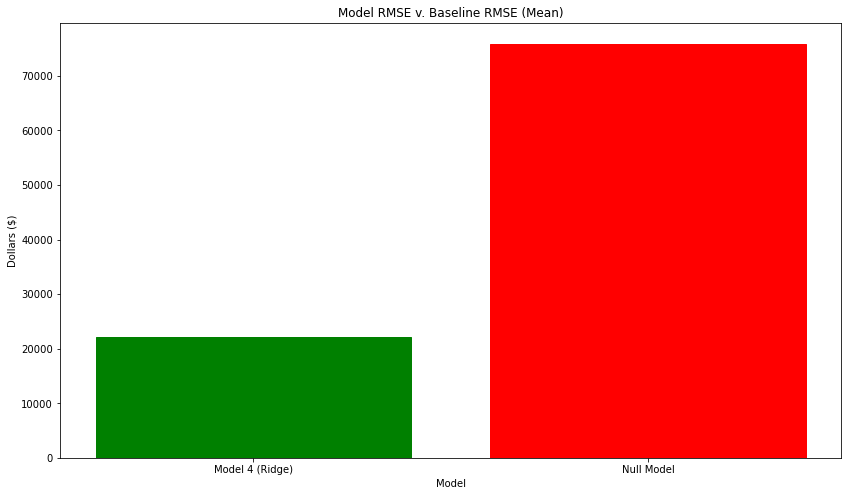

<Figure size 432x288 with 0 Axes>

In [203]:
plt.figure(figsize = (14, 8))
plt.title('Model RMSE v. Baseline RMSE (Mean)')
plt.ylabel('Dollars ($)')
plt.xlabel('Model')
barlist = plt.bar(rmsedf['Model'], rmsedf['RMSE'])
barlist[0].set_color('green')
barlist[1].set_color('red')

plt.show()

plt.tight_layout()
plt.savefig('images/rmse_bar_graph.png');

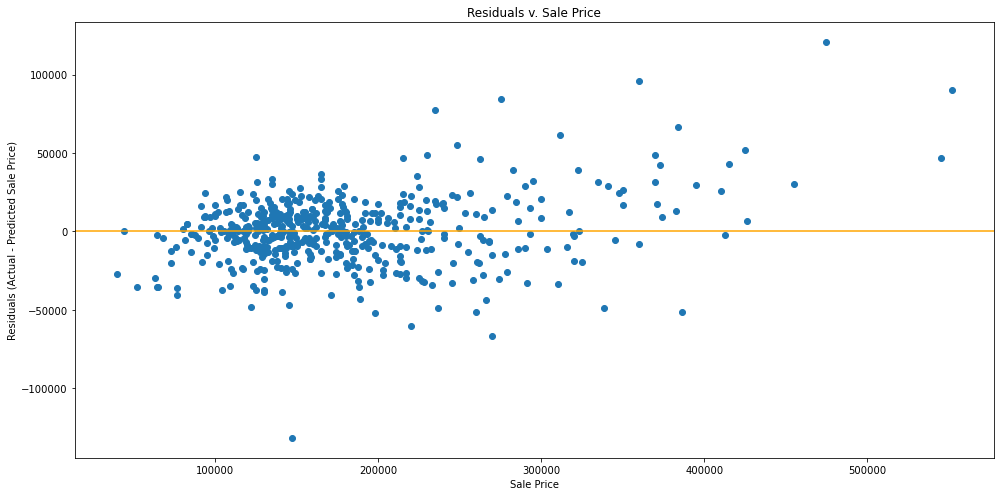

In [213]:
residuals = y_test_3 - preds4

plt.figure(figsize = (14, 7))
plt.title('Residuals v. Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Residuals (Actual - Predicted Sale Price)')
plt.scatter(y_test_3, residuals)
plt.axhline(0, color = 'orange')

plt.tight_layout()
plt.savefig('images/resid_actual_ridge.png');

I used the code below in my lab 3.01. I needed a lot of help to put this graph together. Here are my original sources, quoting from my lab 3.01:

_I used this [stackoverflow](https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data) to understand how to put in the y = x line to help with interpretation of the scatterplot. The idea of using the subplot is in the first answer. I also took the chunk of code to establish the lims and plot them against each other from that answer. I changed the color to orange (taking out 'k-' and adding 'color = 'orange'') to fit my scheme elsewhere, but otherwise those lines (from lims = to ax.set_ylim(lims)) from that answer._

_I also used [this site](https://www.statology.org/subplot-size-matplotlib/') to review how to adjust the figure size for a subplot. I used [this site](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib) to review how to change the title of a subplot. I inferred from this how to change the xlabel and ylabel._

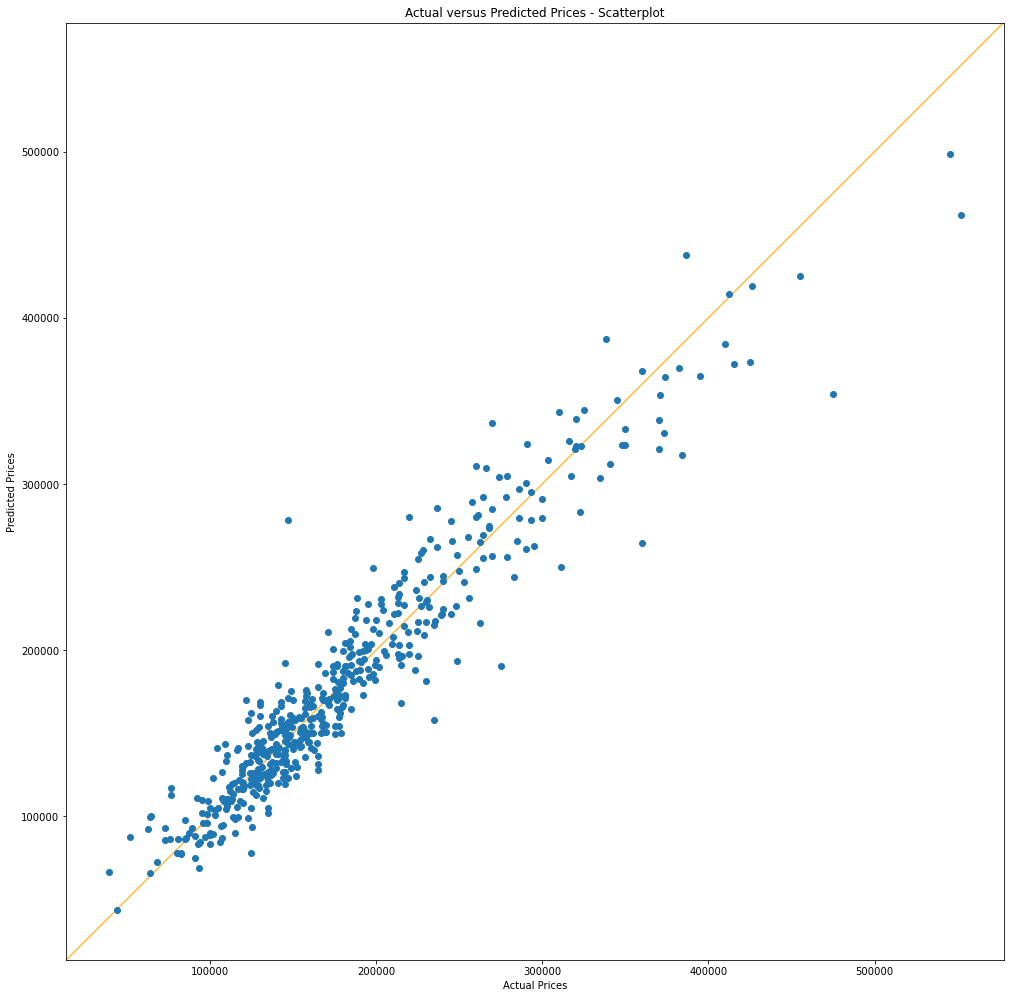

In [210]:
fig, ax = plt.subplots(figsize = (14,14))

ax.scatter(y_test_3, preds4)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, alpha=0.75, zorder=0, color = 'orange')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Actual versus Predicted Prices - Scatterplot')
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')

plt.tight_layout()
plt.savefig('images/act_v_pred_ridge.png');

-----

# Model 5 -- LASSO Model, using features developed for Model 3

I worked off the Regularization lesson to set this up and used the same parameters.

In [128]:
l_alphas = np.logspace(-3, 0, 100)

lasso_cv1 = LassoCV(alphas = l_alphas)

lasso_cv1.fit(Z_train_3, y_train_3)

/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231743206658.67252, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209829476128.47977, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193866001516.27792, tolerance: 743985963.9265606
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [130]:
lasso_cv1.score(Z_train_3, y_train_3)

0.9310250265528249

In [131]:
lasso_cv1.score(Z_test_3, y_test_3)

0.9086749723018875

In [132]:
cross_val_score(lasso_cv1, Z_train_3, y_train_3).mean()

/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181389764303.0377, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169839714588.13794, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159017404981.98404, tolerance: 618419189.1802111
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lorendunn/

0.8496019277500585

The train and test $r^2$ scores are close to each other and similar to Models 3 and 4. The mean cross-validation score of 85.0% is close to the $r^2$. The model is looking well-fit.

In [133]:
preds6 = lasso_cv1.predict(Z_test_3)
preds6[:5]

array([292883.20234055, 196430.69095416, 162085.62721478, 176273.1601632 ,
       290236.00656349])

In [134]:
metrics.mean_squared_error(y_test_3, preds6, squared = False)

22936.8943837565

In [136]:
print(f'Model 6 (Lasso) RMSE: {metrics.mean_squared_error(y_test_3, preds6, squared = False)}')
print(f'Model 4 (Ridge) RMSE: {metrics.mean_squared_error(y_test_3, preds5, squared = False)}')
print(f'Model 3 RMSE: {metrics.mean_squared_error(y_test_3, preds3, squared = False)}')
print(f'Model 2 RMSE: {metrics.mean_squared_error(y_test_1, preds2, squared = False)}')
print(f'Model 1 RMSE: {metrics.mean_squared_error(y_test_1, preds1, squared = False)}')
print(f'Null Model RMSE: {metrics.mean_squared_error(y_test_1, null_pred_list, squared = False)}')

Model 6 (Lasso) RMSE: 22936.8943837565
Model 4 (Ridge) RMSE: 22165.229221207544
Model 3 RMSE: 23780.997587462098
Model 2 RMSE: 24130.420945490245
Model 1 RMSE: 28173.041763341123
Null Model RMSE: 75922.17182221451


The RMSE is actually up a bit from the Ridge model. For the purposes of the Kaggle competition, I'm going to make my last entry from the Ridge model.

-----

# Prepping Kaggle Data with Model 5 (Ridge)

In [137]:
Z_kaggle_3 = sc.transform(X_k_3)

In [138]:
predsk5 = ridge_cv1.predict(Z_kaggle_3)
predsk5[:5]

array([128512.08205333, 152596.94553192, 193540.74355605, 109078.12147686,
       179244.08367727])

In [139]:
ridge_cv1_submission = lr3_submission.copy()

ridge_cv1_submission.head(2)

,SalePrice
Id,
2658,142823.465825
2718,146799.578153


In [140]:
ridge_cv1_submission['SalePrice'] = predsk5

In [141]:
ridge_cv1_submission.head()

,SalePrice
Id,
2658,128512.082053
2718,152596.945532
2414,193540.743556
1989,109078.121477
625,179244.083677


In [142]:
ridge_cv1_submission.to_csv('kaggle_submissions/ridge_cv1_submission.csv')